In [1]:
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "/content/gdrive/MyDrive/Magistrale/Stage/data"
drive.mount("/content/gdrive")
results = pd.read_csv(path + "/ml_out.csv")

Mounted at /content/gdrive


In [3]:
results.shape

(90, 12)

In [6]:
results.head()

,Unnamed: 0,df,train_shape,test_shape,fold,model,accuracy,precision,recall,true_negative_rate,f2_score,f3_score
0,0,ace,"(2246, 13558)","(250, 13558)",1.0,SVM,0.984,0.0,0.00,1.000000,0.000000,0.000000
1,1,ace,"(2246, 13558)","(250, 13558)",1.0,DT,0.984,0.5,0.25,0.995935,0.277778,0.263158
2,2,ace,"(2246, 13558)","(250, 13558)",1.0,RF,0.984,0.0,0.00,1.000000,0.000000,0.000000
3,3,ace,"(2246, 13558)","(250, 13558)",2.0,SVM,0.976,0.0,0.00,0.991870,0.000000,0.000000
4,4,ace,"(2246, 13558)","(250, 13558)",2.0,DT,0.956,0.0,0.00,0.971545,0.000000,0.000000


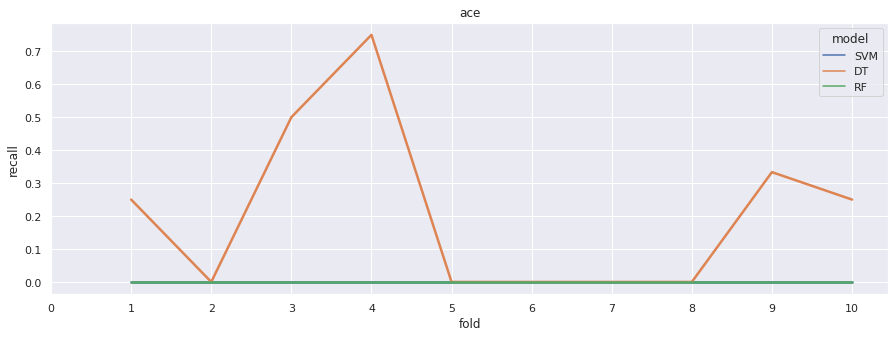

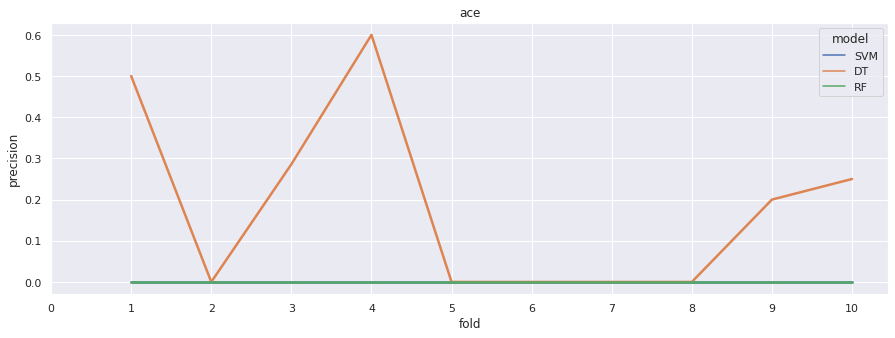

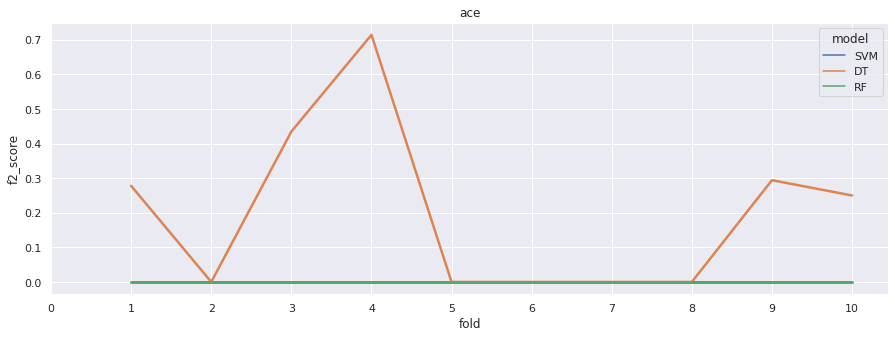

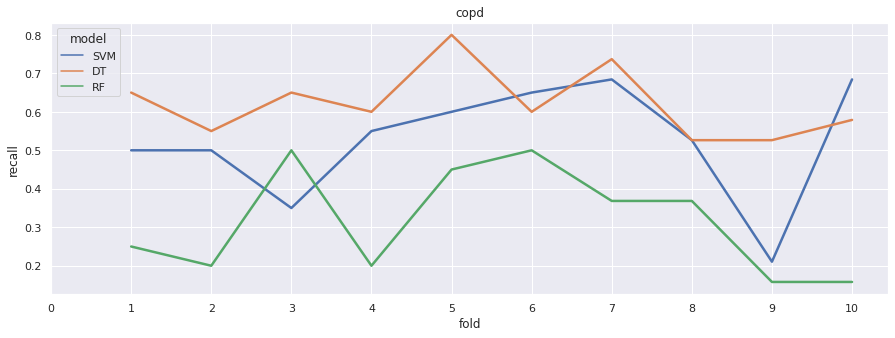

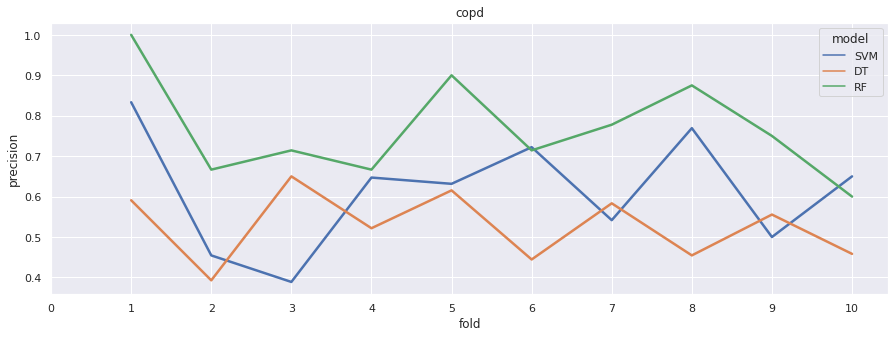

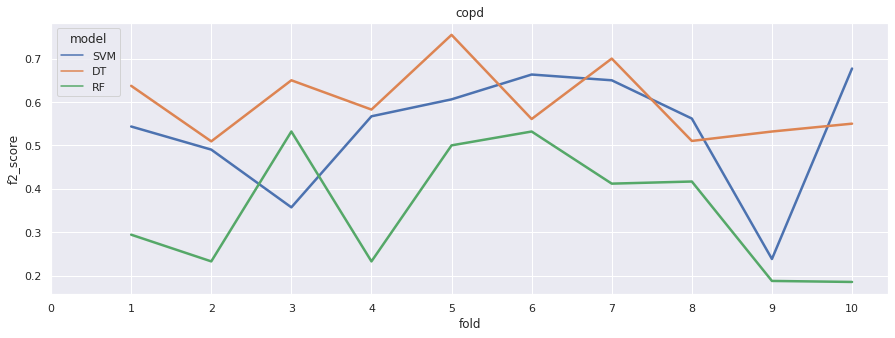

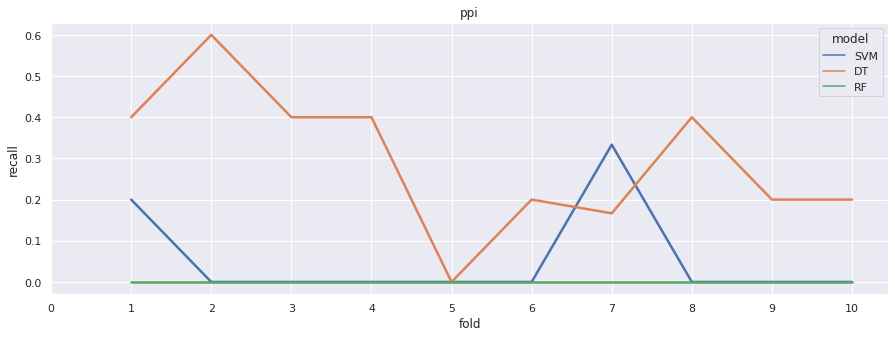

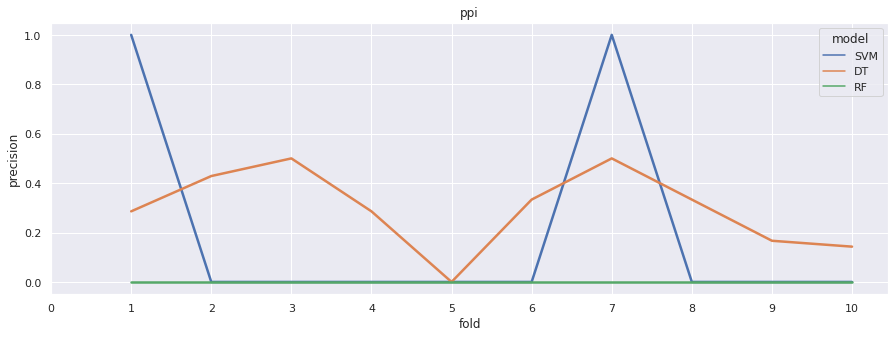

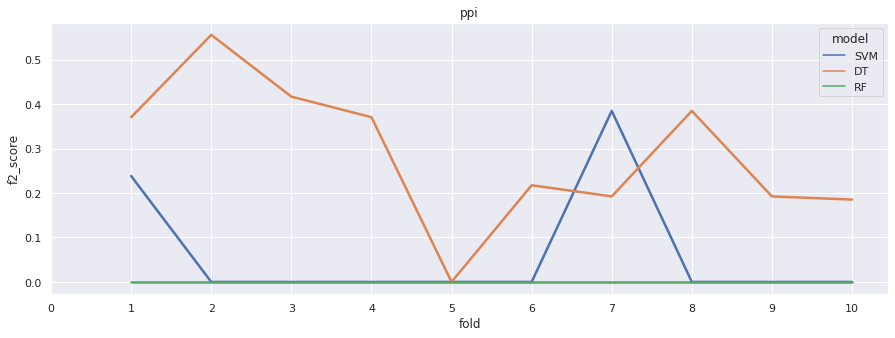

In [9]:
n_folds = 10
for d in results["df"].unique(): 
  for m in ["recall", "precision", "f2_score"]: #for every metric

    y = results.loc[results["df"] == d, ["model", "fold" , m]]

    #plot
        
    sns.set(rc = {'figure.figsize':(15,5)})
    plt.figure()
    y = y.sort_values(by=['fold'])
    g = sns.lineplot(data=y, x="fold", y=m, hue="model", linewidth=2.5).set(title=d)
    plt.xticks(range(0, n_folds+1), range(0, n_folds+1))